# IS 362 Project 2: Untidy Data

**Prompt:**
The goal of this assignment is to give you practice in preparing different datasets for downstream analysis work.

Your task is to:

1. Choose any three of the “wide” datasets identified in the Week 5 Discussion items. (You may use your own dataset; please don’t use my Sample Post dataset, since that was used in your Project 1 assignment!) For each of the three chosen datasets:

>* Create a .CSV file (or optionally, a MySQL database!) that includes all of 
the information included in the dataset. You’re encouraged to use a “wide” structure similar to how the information appears in the discussion item, so that you can practice tidying and transformations as described below.
>* Read the information from your .CSV file into Python, and use pandas as needed to tidy and transform your data. [Most of your grade will be based on this step!]
>* Perform the analysis requested in the discussion item.
>* Your code should be in an Jupyter Notebook, posted to your GitHub repository, and should include narrative descriptions of your data cleanup work, analysis, and conclusions.

2. Please include the URL for the Jupyter Notebook in your homework submission, for each of the three chosen datasets. You may create a single Jupyter Notebook, or three separate notebooks.

In [1]:
# import pandas
import pandas as pd

## Untidy dataset 1

This dataset, which holds information about Dungeons & Dragons characters, was posted by a classmate who requested the following actions:
1. The race's could be organized better and possibly alphabetized
2. The background is messy and should be alphabetized
3. The date column could be removed
4. Class should be specific, instead of mage 2 it should just say mage or even healer/caster
5. Just class should be replaced with items

In [2]:
# read the tsv
df = pd.read_csv('https://raw.githubusercontent.com/oganm/dndstats/e28a27087f1495d4dfa65d9886a7ee75342fc6b2/docs/charTable.tsv', sep='\t', header=0)

In [3]:
# how many columns are in this dataset?
df.info() # there are 28 columns, and 1347 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   name                1347 non-null   object
 1   race                1344 non-null   object
 2   background          1342 non-null   object
 3   date                1347 non-null   object
 4   class               1347 non-null   object
 5   justClass           1347 non-null   object
 6   subclass            1032 non-null   object
 7   level               1347 non-null   int64 
 8   feats               462 non-null    object
 9   HP                  1347 non-null   int64 
 10  AC                  1347 non-null   int64 
 11  Str                 1347 non-null   int64 
 12  Dex                 1347 non-null   int64 
 13  Con                 1347 non-null   int64 
 14  Int                 1347 non-null   int64 
 15  Wis                 1347 non-null   int64 
 16  Cha                 1347

In [4]:
# view a snapshot of the dataset
df.head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
0,9f3a61,Human,Charlatan,2018-07-27T23:53:51Z,Warlock 1,Warlock,The Fiend,1,Lucky,8,...,Sleight of Hand|Insight|Perception|Deception|I...,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
1,9f3a61,Human,Custom,2018-07-27T17:07:02Z,Warlock 1,Warlock,The Fiend,1,Lucky,8,...,Insight|Deception|Intimidation,"Crossbow, light|Eldritch Blast PHB237|Burning ...",Eldritch blast*0|Minor illusion*0|Hex*1|Burnin...,07 27 18,CN,N,C,Human,Eldritch Blast*0|Minor Illusion*0|Hex*1|Burnin...,"Crossbow, Light|Dagger"
2,7a2bfc,Kenku,Criminal,2018-05-27T20:14:52Z,Warlock 3,Warlock,The Celestial,3,NaN,13,...,Sleight of Hand|Stealth|Arcana|Religion|Deception,"Crossbow, Light|Dagger",Light*0|Sacred Flame*0|Eldritch Blast*0|Agoniz...,05 27 18,NaN,NaN,NaN,Kenku,Light*0|Sacred Flame*0|Eldritch Blast*0|Eldrit...,"Crossbow, Light|Dagger"
3,aa8854,High Elf,Criminal,2018-08-04T15:45:17Z,Wizard 1,Wizard,NaN,1,NaN,7,...,Stealth|Arcana|Investigation|Perception|Deception,Quarterstaff,NaN,08 04 18,NaN,NaN,NaN,Elf,NaN,Quarterstaff
4,26410c,Firbolg,Folk Hero,2018-07-26T03:31:17Z,Cleric 4,Cleric,Trickery Domain,4,Inspiring Leader,42,...,History|Animal Handling|Insight|Survival,"Mace|Crossbow, light",Charm Person*1|Disguise Self*1|Mirror Image*2|...,07 25 18,NaN,NaN,NaN,Firbolg,Charm Person*1|Disguise Self*1|Mirror Image*2|...,"Mace|Crossbow, Light"


In [5]:
# how many values are null?
df.isnull().sum()

name                    0
race                    3
background              5
date                    0
class                   0
justClass               0
subclass              315
level                   0
feats                 885
HP                      0
AC                      0
Str                     0
Dex                     0
Con                     0
Int                     0
Wis                     0
Cha                     0
alignment             869
skills                  0
weapons                 9
spells                751
day                     0
processedAlignment    877
good                  877
lawful                877
processedRace          42
processedSpells       751
processedWeapons       24
dtype: int64

Rows 0 and 1 have the same name. These rows also share the same race, class, and several other features. But, they differ in skills. There are other names, like 55288fb, that have multiple records in this dataset.

In [6]:
# how many records per unique name?
df.name.value_counts()

5528fb    52
4ed3b0     9
1d594f     7
4626a0     7
32a85e     7
          ..
b1cb6a     1
ec35a6     1
795235     1
1a61cc     1
ff10fc     1
Name: name, Length: 856, dtype: int64

In [7]:
# how many unique names in this dataset?
df['name'].nunique()

856

Of the 1347 records, there are only 856 unique names.

In [8]:
# character 5528fb appears 52 times
# is each record identical?
char_5528fb = df[df.name == '5528fb']
char_5528fb.head() # each record is not identical, thus duplicates cannot be easily dropped

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
71,5528fb,Human,Criminal,2018-06-13T05:50:10Z,Fighter 9|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,10,Crossbow Expert|Sharpshooter|Resilient,93,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Dagger|Sling|Net",Resistance*0|Thaumaturgy*0|Mending*0|Identify*...,06 12 18,LN,N,L,Human,Resistance*0|Thaumaturgy*0|Mending*0|Identify*...,"Longbow|Crossbow, hand|Dagger|Sling|Net"
73,5528fb,Human,Criminal,2018-06-04T19:20:55Z,Fighter 5,Fighter,Battle Master,5,Crossbow Expert|Sharpshooter,49,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier",NaN,06 04 18,LN,N,L,Human,NaN,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier"
95,5528fb,Human,Criminal,2018-06-17T10:12:20Z,Fighter 12|Cleric 4,Fighter|Cleric,Battle Master|Forge Domain,16,Crossbow Expert|Sharpshooter|Resilient|Lucky,160,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Dagger|Sling|Net",Resistance*0|Thaumaturgy*0|Mending*0|Identify*...,06 17 18,LN,N,L,Human,Resistance*0|Thaumaturgy*0|Mending*0|Identify*...,"Longbow|Crossbow, hand|Dagger|Sling|Net"
171,5528fb,Human,Criminal,2018-07-09T20:31:06Z,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Dagger|Sling|Greatsword...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,07 09 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Dagger|Sling|Greatsword..."
241,5528fb,Human,Criminal,2018-07-24T18:41:14Z,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Dagger|Sling|Greatsword...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,07 24 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Dagger|Sling|Greatsword..."


Because each record is not identical, I will use the date column to drop all but the most recent record per unique name.

In [9]:
# import datetime and convert the 'date' column to a datetime object
import datetime
df['date'] = pd.to_datetime(df['date'])

In [10]:
# output the data associated with character 5528fb once more, and sort by date
char_5528fb = df[df.name == '5528fb']
char_5528fb.sort_values('date').head()

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
1011,5528fb,Human,Criminal,2018-04-06 21:58:35+00:00,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,04 06 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S..."
1006,5528fb,Human,Criminal,2018-04-09 01:15:14+00:00,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,04 08 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S..."
1058,5528fb,Human,Criminal,2018-04-16 21:33:57+00:00,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,04 16 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S..."
1219,5528fb,Human,Criminal,2018-04-16 21:38:28+00:00,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,04 16 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S..."
1192,5528fb,Human,Criminal,2018-05-08 01:44:43+00:00,Fighter 8|Cleric 1,Fighter|Cleric,Battle Master|Forge Domain,9,Crossbow Expert|Sharpshooter|Resilient,84,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S...",Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,05 07 18,LN,N,L,Human,Mending*0|Resistance*0|Thaumaturgy*0|Identify*...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier|S..."


In [11]:
# by default the sorted dates appear oldest at the top and newest at the bottom, so we will keep only the last record per unique name
char_5528fb.sort_values('date').drop_duplicates(subset="name", keep="last")   

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
332,5528fb,Human,Criminal,2018-08-12 05:43:42+00:00,Fighter 5,Fighter,Battle Master,5,Crossbow Expert|Sharpshooter,49,...,Stealth|Insight|Perception|Intimidation|Persua...,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier",NaN,08 11 18,LN,N,L,Human,NaN,"Longbow|Crossbow, hand|Handaxe|Dagger|Rapier"


In [12]:
# the drop duplicate name statement applied above is now applied to the entire dataset
unique_names_df = df.sort_values('date').drop_duplicates(subset="name", keep="last") 

### Request 1: Sort by race

In [13]:
df['race'].nunique() # there are 74 unique race values

74

There are 74 unique race values in this dataset.

In [14]:
# the dataset containing only one unique name per record is sorted by race
byrace_alphabetized = unique_names_df.sort_values('race')
byrace_alphabetized

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
688,f60939,1/2 Elf--Var.,Faction Agent/Outlander,2018-05-28 03:18:20+00:00,Paladin 4,Paladin,Oath of Ancients,4,Heavy Armor Master,42,...,Athletics|Nature|Religion|Insight|Survival|Per...,Greatsword|Javelin|Quarterstaff|Whip,Fire Bolt*0|Ensnaring Strike*1|Speak with Anim...,05 27 18,NG,G,N,Elf,Fire Bolt*0|Ensnaring Strike*1|Speak with Anim...,Greatsword|Javelin|Quarterstaff|Whip
868,2eaaeb,Aarakocra,Acolyte,2018-08-12 11:02:19+00:00,Paladin 5,Paladin,Oath of Vengeance,5,NaN,39,...,Athletics|Religion|Insight|Persuasion,Longsword|Whip,Bane*1|Hunter’s Mark*1|Wrathful Smite*1|Hold P...,08 12 18,NaN,NaN,NaN,Aarakocra,Bane*1|Hunter’s Mark*1|Wrathful Smite*1|Hold P...,Longsword|Whip
217,94abff,Aarakocra,Far Traveler,2018-06-16 20:24:15+00:00,Cleric 1,Cleric,Arcana Domain,1,NaN,51,...,Sleight of Hand|Arcana|Investigation|Insight|P...,"Handaxe|Light hammer|Crossbow, light|THUNDER C...",Mend*0|Detect Magic*1|Magic Missile*1,06 16 18,CN,N,C,Aarakocra,Mending*0|Detect Magic*1|Magic Missile*1,"Handaxe|Light hammer|Crossbow, Light"
556,4dd432,Aarakocra,City Watch,2018-08-05 18:28:06+00:00,Rogue 1,Rogue,NaN,1,NaN,10,...,Athletics|Investigation|Insight|Perception|Dec...,Rapier|Shortbow|Dagger,NaN,08 05 18,NaN,NaN,NaN,Aarakocra,NaN,Rapier|Shortbow|Dagger
290,afe304,Aarakocra,Far Traveler,2018-08-14 18:33:43+00:00,Ranger 12,Ranger,Beast Master,12,Lucky|Sharpshooter,88,...,Athletics|Stealth|Animal Handling|Insight|Perc...,Shortsword|Longbow,NaN,08 14 18,NaN,NaN,NaN,Aarakocra,NaN,Shortsword|Longbow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,a22394,Yuan-Ti,Charlatan,2018-08-28 02:28:49+00:00,Cleric 1,Cleric,Trickery Domain,1,NaN,9,...,Sleight of Hand|Religion|Medicine|Deception,Mace|Sickle,Mending*0|Spare The Dying*0|Sacred Flame*0|Cha...,08 27 18,CG,G,C,NaN,Mending*0|Spare the Dying*0|Sacred Flame*0|Cha...,Mace|Sickle
511,e791b4,elf,urchin,2018-08-01 19:30:12+00:00,Warlock 1,Warlock,The Fiend,1,NaN,10,...,Investigation|Intimidation,NaN,NaN,08 01 18,NG,G,N,Elf,NaN,NaN
138,e90b81,naga,Outlander,2018-06-10 15:03:42+00:00,Revised Ranger 7|Rogue 1,Revised Ranger|Rogue,Beast Conclave|,8,NaN,93,...,Athletics|Stealth|Investigation|Animal Handlin...,Shortsword|Longbow,NaN,06 10 18,NaN,NaN,NaN,NaN,NaN,Shortsword|Longbow
945,91e276,NaN,NaN,2018-05-12 20:53:40+00:00,Paladin 4,Paladin,Oath of Devotion,4,NaN,60,...,Athletics|Religion|Intimidation|Persuasion,Warhammer|Javelin,Protection from Evil and Good*1|Sanctuary*1,05 12 18,NaN,NaN,NaN,NaN,Protection from Evil and Good*1|Sanctuary*1,Warhammer|Javelin


### Request 2: Sort by background

In [15]:
df['background'].nunique() # there are 43 unique background values

43

There are 43 unique background values in this dataset. I'll sort by both race and background.

In [16]:
by_race_and_background = unique_names_df.sort_values(['race','background'])
by_race_and_background.dropna(subset=['race', 'background'], how='any') # drop rows with null values for race or background
by_race_and_background

,name,race,background,date,class,justClass,subclass,level,feats,HP,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
688,f60939,1/2 Elf--Var.,Faction Agent/Outlander,2018-05-28 03:18:20+00:00,Paladin 4,Paladin,Oath of Ancients,4,Heavy Armor Master,42,...,Athletics|Nature|Religion|Insight|Survival|Per...,Greatsword|Javelin|Quarterstaff|Whip,Fire Bolt*0|Ensnaring Strike*1|Speak with Anim...,05 27 18,NG,G,N,Elf,Fire Bolt*0|Ensnaring Strike*1|Speak with Anim...,Greatsword|Javelin|Quarterstaff|Whip
983,130cd5,Aarakocra,Acolyte,2018-06-17 09:24:40+00:00,Barbarian 1,Barbarian,NaN,1,NaN,11,...,Athletics|Religion|Animal Handling|Insight,Greataxe|Handaxe|Javelin,NaN,06 17 18,NaN,NaN,NaN,Aarakocra,NaN,Greataxe|Handaxe|Javelin
868,2eaaeb,Aarakocra,Acolyte,2018-08-12 11:02:19+00:00,Paladin 5,Paladin,Oath of Vengeance,5,NaN,39,...,Athletics|Religion|Insight|Persuasion,Longsword|Whip,Bane*1|Hunter’s Mark*1|Wrathful Smite*1|Hold P...,08 12 18,NaN,NaN,NaN,Aarakocra,Bane*1|Hunter’s Mark*1|Wrathful Smite*1|Hold P...,Longsword|Whip
556,4dd432,Aarakocra,City Watch,2018-08-05 18:28:06+00:00,Rogue 1,Rogue,NaN,1,NaN,10,...,Athletics|Investigation|Insight|Perception|Dec...,Rapier|Shortbow|Dagger,NaN,08 05 18,NaN,NaN,NaN,Aarakocra,NaN,Rapier|Shortbow|Dagger
217,94abff,Aarakocra,Far Traveler,2018-06-16 20:24:15+00:00,Cleric 1,Cleric,Arcana Domain,1,NaN,51,...,Sleight of Hand|Arcana|Investigation|Insight|P...,"Handaxe|Light hammer|Crossbow, light|THUNDER C...",Mend*0|Detect Magic*1|Magic Missile*1,06 16 18,CN,N,C,Aarakocra,Mending*0|Detect Magic*1|Magic Missile*1,"Handaxe|Light hammer|Crossbow, Light"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,a22394,Yuan-Ti,Charlatan,2018-08-28 02:28:49+00:00,Cleric 1,Cleric,Trickery Domain,1,NaN,9,...,Sleight of Hand|Religion|Medicine|Deception,Mace|Sickle,Mending*0|Spare The Dying*0|Sacred Flame*0|Cha...,08 27 18,CG,G,C,NaN,Mending*0|Spare the Dying*0|Sacred Flame*0|Cha...,Mace|Sickle
511,e791b4,elf,urchin,2018-08-01 19:30:12+00:00,Warlock 1,Warlock,The Fiend,1,NaN,10,...,Investigation|Intimidation,NaN,NaN,08 01 18,NG,G,N,Elf,NaN,NaN
138,e90b81,naga,Outlander,2018-06-10 15:03:42+00:00,Revised Ranger 7|Rogue 1,Revised Ranger|Rogue,Beast Conclave|,8,NaN,93,...,Athletics|Stealth|Investigation|Animal Handlin...,Shortsword|Longbow,NaN,06 10 18,NaN,NaN,NaN,NaN,NaN,Shortsword|Longbow
945,91e276,NaN,NaN,2018-05-12 20:53:40+00:00,Paladin 4,Paladin,Oath of Devotion,4,NaN,60,...,Athletics|Religion|Intimidation|Persuasion,Warhammer|Javelin,Protection from Evil and Good*1|Sanctuary*1,05 12 18,NaN,NaN,NaN,NaN,Protection from Evil and Good*1|Sanctuary*1,Warhammer|Javelin


### Requests 3, 4 and 5: Drop the date and class columns

Though I found the date column useful in devising some method to eliminate duplicate names, I will drop the date column in this updated version of the dataframe. I will also eliminate the redundant justClass column and level column as this information is somewhat redundant. Where there are multiple classes, the level column is a sum of the levels indicated in the class column and this may not be accurately reflect the characters' level - for this reason, rather than dropping the class and level columns as requested, I am dropping the justClass column instead.

In [17]:
tidied_df = by_race_and_background.drop(['date', 'justClass', 'level'], 1)
tidied_df

,name,race,background,class,subclass,feats,HP,AC,Str,Dex,...,skills,weapons,spells,day,processedAlignment,good,lawful,processedRace,processedSpells,processedWeapons
688,f60939,1/2 Elf--Var.,Faction Agent/Outlander,Paladin 4,Oath of Ancients,Heavy Armor Master,42,19,16,12,...,Athletics|Nature|Religion|Insight|Survival|Per...,Greatsword|Javelin|Quarterstaff|Whip,Fire Bolt*0|Ensnaring Strike*1|Speak with Anim...,05 27 18,NG,G,N,Elf,Fire Bolt*0|Ensnaring Strike*1|Speak with Anim...,Greatsword|Javelin|Quarterstaff|Whip
983,130cd5,Aarakocra,Acolyte,Barbarian 1,NaN,NaN,11,9,8,10,...,Athletics|Religion|Animal Handling|Insight,Greataxe|Handaxe|Javelin,NaN,06 17 18,NaN,NaN,NaN,Aarakocra,NaN,Greataxe|Handaxe|Javelin
868,2eaaeb,Aarakocra,Acolyte,Paladin 5,Oath of Vengeance,NaN,39,18,18,13,...,Athletics|Religion|Insight|Persuasion,Longsword|Whip,Bane*1|Hunter’s Mark*1|Wrathful Smite*1|Hold P...,08 12 18,NaN,NaN,NaN,Aarakocra,Bane*1|Hunter’s Mark*1|Wrathful Smite*1|Hold P...,Longsword|Whip
556,4dd432,Aarakocra,City Watch,Rogue 1,NaN,NaN,10,16,9,18,...,Athletics|Investigation|Insight|Perception|Dec...,Rapier|Shortbow|Dagger,NaN,08 05 18,NaN,NaN,NaN,Aarakocra,NaN,Rapier|Shortbow|Dagger
217,94abff,Aarakocra,Far Traveler,Cleric 1,Arcana Domain,NaN,51,18,10,16,...,Sleight of Hand|Arcana|Investigation|Insight|P...,"Handaxe|Light hammer|Crossbow, light|THUNDER C...",Mend*0|Detect Magic*1|Magic Missile*1,06 16 18,CN,N,C,Aarakocra,Mending*0|Detect Magic*1|Magic Missile*1,"Handaxe|Light hammer|Crossbow, Light"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,a22394,Yuan-Ti,Charlatan,Cleric 1,Trickery Domain,NaN,9,18,8,15,...,Sleight of Hand|Religion|Medicine|Deception,Mace|Sickle,Mending*0|Spare The Dying*0|Sacred Flame*0|Cha...,08 27 18,CG,G,C,NaN,Mending*0|Spare the Dying*0|Sacred Flame*0|Cha...,Mace|Sickle
511,e791b4,elf,urchin,Warlock 1,The Fiend,NaN,10,18,11,12,...,Investigation|Intimidation,NaN,NaN,08 01 18,NG,G,N,Elf,NaN,NaN
138,e90b81,naga,Outlander,Revised Ranger 7|Rogue 1,Beast Conclave|,NaN,93,14,8,17,...,Athletics|Stealth|Investigation|Animal Handlin...,Shortsword|Longbow,NaN,06 10 18,NaN,NaN,NaN,NaN,NaN,Shortsword|Longbow
945,91e276,NaN,NaN,Paladin 4,Oath of Devotion,NaN,60,22,16,12,...,Athletics|Religion|Intimidation|Persuasion,Warhammer|Javelin,Protection from Evil and Good*1|Sanctuary*1,05 12 18,NaN,NaN,NaN,NaN,Protection from Evil and Good*1|Sanctuary*1,Warhammer|Javelin


There is still much to be done to tidy this data. The tidiest solution is to split this table into several tables, each with a clearer focus. For instance, a table for the characters and their features, and separate tables for race, background, class, skills, and weapons.

## Untidy dataset 2

This dataset, which shows information about covid vaccinations by country, was posted by a classmate who requested answers to the following questions:

1. In which country the vaccination programme is more advanced?
2. Where are more people being vaccinated per day? But in terms of percent from entire population ?
3. Which countries are lacking behind in COVID-19 vaccinations?
4. Which countries have the highest daily vaccinations on a certain date?

To answer the questions above, the df should be cleaned and organized so that:

* there is only one record of each country with aggregated data
* drop columns that contain irrelevant information (though important, the vaccine type and website do not help answer the questions above)

In [18]:
# read the csv
df = pd.read_csv('C:/Users/snr13/Google Drive/School/CUNY/IS 362/Projects/project2/covid-data/country_vaccinations.csv')

In [19]:
# how many columns are in this dataset?
df.info() # there are 15 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5140 entries, 0 to 5139
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              5140 non-null   object 
 1   iso_code                             4816 non-null   object 
 2   date                                 5140 non-null   object 
 3   total_vaccinations                   3282 non-null   float64
 4   people_vaccinated                    2856 non-null   float64
 5   people_fully_vaccinated              1943 non-null   float64
 6   daily_vaccinations_raw               2759 non-null   float64
 7   daily_vaccinations                   4958 non-null   float64
 8   total_vaccinations_per_hundred       3282 non-null   float64
 9   people_vaccinated_per_hundred        2856 non-null   float64
 10  people_fully_vaccinated_per_hundred  1943 non-null   float64
 11  daily_vaccinations_per_million

In [20]:
# view a snapshot of this data
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [21]:
# how many values are null?
df.isnull().sum()

country                                   0
iso_code                                324
date                                      0
total_vaccinations                     1858
people_vaccinated                      2284
people_fully_vaccinated                3197
daily_vaccinations_raw                 2381
daily_vaccinations                      182
total_vaccinations_per_hundred         1858
people_vaccinated_per_hundred          2284
people_fully_vaccinated_per_hundred    3197
daily_vaccinations_per_million          182
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [22]:
# how many countries are included in this dataset?
df.country.value_counts() # 123 countries

Lithuania           87
Canada              81
Northern Ireland    81
Wales               81
England             81
                    ..
Thailand             4
Uruguay              4
Philippines          3
Honduras             1
Saint Helena         1
Name: country, Length: 123, dtype: int64

In [23]:
# Lithuania has the largest number of records, each with a unique date
lithuania = df[df.country == 'Lithuania']
lithuania

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2881,Lithuania,LTU,2020-12-08,1.0,1.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2882,Lithuania,LTU,2020-12-09,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,47.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2883,Lithuania,LTU,2020-12-10,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,47.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2884,Lithuania,LTU,2020-12-11,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,47.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2885,Lithuania,LTU,2020-12-12,NaN,NaN,NaN,NaN,127.0,NaN,NaN,NaN,47.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2963,Lithuania,LTU,2021-02-28,238597.0,165320.0,73277.0,404.0,6535.0,8.76,6.07,2.69,2401.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2964,Lithuania,LTU,2021-03-01,246094.0,172671.0,73423.0,7497.0,7215.0,9.04,6.34,2.70,2650.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2965,Lithuania,LTU,2021-03-02,255278.0,181261.0,74017.0,9184.0,7301.0,9.38,6.66,2.72,2682.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...
2966,Lithuania,LTU,2021-03-03,266827.0,190658.0,76169.0,11549.0,7295.0,9.80,7.00,2.80,2680.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Ministry of Health,https://ls-osp-sdg.maps.arcgis.com/apps/opsdas...


In [24]:
# Honduras has a single record in this dataset
honduras  = df[df.country == 'Honduras']
honduras

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
2098,Honduras,HND,2021-02-28,2684.0,2684.0,NaN,NaN,NaN,0.03,0.03,NaN,NaN,Moderna,Government of Honduras,https://www.elheraldo.hn/sucesos/1446200-466/h...


There's a big discrepancy in number of records per country. In the two queries above, Lithuania shows 87 records but only 1 record for Honduras. For countries with more than one entry, each new entry updates the last. So - for the purposes of this type of dataset, that compares country to country - there is no need to have more than one entry per country.

In [25]:
# import datetime and convert the 'date' column to a datetime object
import datetime
df['date'] = pd.to_datetime(df['date'])

In [26]:
# a new dataframe df2 will drop all entries except for the most recent for each country
df2 = df.sort_values('date').drop_duplicates(subset="country", keep="last") 
df2

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3243,Monaco,MCO,2021-01-18,2400.0,NaN,NaN,NaN,126.0,6.12,NaN,NaN,3211.0,Pfizer/BioNTech,National Council,https://www.monaco-tribune.com/en/2021/01/covi...
3412,Northern Cyprus,OWID_NCY,2021-01-22,11000.0,NaN,NaN,NaN,1429.0,2.88,NaN,NaN,3739.0,"Pfizer/BioNTech, Sinovac",Ministry of Health,https://cyprus-mail.com/2021/01/22/coronavirus...
1481,Egypt,EGY,2021-01-30,1315.0,NaN,NaN,NaN,219.0,0.00,NaN,NaN,2.0,Sinopharm/Beijing,Ministry of Health,http://english.ahram.org.eg/NewsContent/1/64/3...
3320,Myanmar,MMR,2021-02-02,103142.0,103142.0,NaN,NaN,14735.0,0.19,0.19,NaN,271.0,Oxford/AstraZeneca,Ministry of Health,https://www.mmtimes.com/news/more-380000-myanm...
4055,Saint Helena,SHN,2021-02-03,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN,Oxford/AstraZeneca,Government of Saint Helena,https://www.sainthelena.gov.sh/2021/news/covid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,Sweden,SWE,2021-03-04,853209.0,568031.0,285178.0,35503.0,23277.0,8.45,5.62,2.82,2305.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Public Health Agency of Sweden,https://www.folkhalsomyndigheten.se/smittskydd...
1753,Finland,FIN,2021-03-04,509187.0,425545.0,83642.0,21568.0,16047.0,9.19,7.68,1.51,2896.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Finnish Institute for Health and Welfare,https://sampo.thl.fi/pivot/prod/en/vaccreg/cov...
5033,United States,USA,2021-03-04,82572848.0,54035670.0,27795980.0,2032374.0,2042676.0,24.69,16.16,8.31,6108.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2455,Isle of Man,IMN,2021-03-04,23438.0,15727.0,7711.0,9.0,663.0,27.56,18.50,9.07,7797.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Isle of Man Government,https://covid19.gov.im/general-information/cov...


In [27]:
tidied_df2 = df2.drop(['iso_code', 'date', 'vaccines', 'source_name', 'source_website'], 1)
tidied_df2

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
3243,Monaco,2400.0,NaN,NaN,NaN,126.0,6.12,NaN,NaN,3211.0
3412,Northern Cyprus,11000.0,NaN,NaN,NaN,1429.0,2.88,NaN,NaN,3739.0
1481,Egypt,1315.0,NaN,NaN,NaN,219.0,0.00,NaN,NaN,2.0
3320,Myanmar,103142.0,103142.0,NaN,NaN,14735.0,0.19,0.19,NaN,271.0
4055,Saint Helena,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4680,Sweden,853209.0,568031.0,285178.0,35503.0,23277.0,8.45,5.62,2.82,2305.0
1753,Finland,509187.0,425545.0,83642.0,21568.0,16047.0,9.19,7.68,1.51,2896.0
5033,United States,82572848.0,54035670.0,27795980.0,2032374.0,2042676.0,24.69,16.16,8.31,6108.0
2455,Isle of Man,23438.0,15727.0,7711.0,9.0,663.0,27.56,18.50,9.07,7797.0


### Question 1: Sort by vaccinations administered

It's difficult to know which program is most effective from the information presented here, but if total_vaccinations are an indicator than the United States is leading. Because the dataset now includes only one record per country, it is easy to sort by total vaccinations.

In [28]:
tidied_df2.sort_values('total_vaccinations', ascending=False)

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5033,United States,82572848.0,54035670.0,27795980.0,2032374.0,2042676.0,24.69,16.16,8.31,6108.0
1079,China,52520000.0,NaN,NaN,NaN,631579.0,3.65,NaN,NaN,439.0
4958,United Kingdom,21946433.0,20982571.0,963862.0,347406.0,364840.0,32.33,30.91,1.42,5374.0
1571,England,18469922.0,17785702.0,684220.0,275003.0,304623.0,32.81,31.60,1.22,5412.0
2290,India,18005503.0,14796835.0,3208668.0,1389455.0,705494.0,1.30,1.07,0.23,511.0
...,...,...,...,...,...,...,...,...,...,...
4060,San Marino,883.0,883.0,NaN,303.0,212.0,2.60,2.60,NaN,6247.0
3276,Montserrat,652.0,652.0,NaN,NaN,43.0,13.04,13.04,NaN,8602.0
4728,Trinidad and Tobago,440.0,440.0,NaN,NaN,63.0,0.03,0.03,NaN,45.0
5043,Venezuela,157.0,157.0,NaN,NaN,31.0,0.00,0.00,NaN,1.0


### Question 2: Sort by daily vaccinations

There are two columns that contain information about daily vaccinations. Without more information it is difficult to know how raw_daily_vaccinations differs from daily_vaccinations. However, the United States is leading in number of vaccines administered per day.

In [29]:
tidied_df2.sort_values('daily_vaccinations', ascending=False)

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
5033,United States,82572848.0,54035670.0,27795980.0,2032374.0,2042676.0,24.69,16.16,8.31,6108.0
2290,India,18005503.0,14796835.0,3208668.0,1389455.0,705494.0,1.30,1.07,0.23,511.0
1079,China,52520000.0,NaN,NaN,NaN,631579.0,3.65,NaN,NaN,439.0
4958,United Kingdom,21946433.0,20982571.0,963862.0,347406.0,364840.0,32.33,30.91,1.42,5374.0
1571,England,18469922.0,17785702.0,684220.0,275003.0,304623.0,32.81,31.60,1.22,5412.0
...,...,...,...,...,...,...,...,...,...,...
2042,Greenland,3927.0,3927.0,NaN,NaN,41.0,6.92,6.92,NaN,722.0
1689,Falkland Islands,1732.0,1732.0,NaN,NaN,31.0,49.73,49.73,NaN,8900.0
5043,Venezuela,157.0,157.0,NaN,NaN,31.0,0.00,0.00,NaN,1.0
4055,Saint Helena,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN


However, if I sort by the daily_vaccinations_per_million column, Gibraltar is leading.

In [30]:
tidied_df2.sort_values('daily_vaccinations_per_million', ascending=False)

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
1941,Gibraltar,40652.0,25629.0,15023.0,1330.0,865.0,120.66,76.07,44.59,25675.0
4319,Seychelles,80863.0,56261.0,24602.0,NaN,1147.0,82.23,57.21,25.02,11664.0
3082,Maldives,137124.0,NaN,NaN,7700.0,5545.0,25.37,NaN,NaN,10258.0
2531,Israel,8555933.0,4901136.0,3654797.0,114993.0,88759.0,98.85,56.62,42.22,10255.0
610,Bermuda,21387.0,NaN,NaN,NaN,616.0,34.34,NaN,NaN,9892.0
...,...,...,...,...,...,...,...,...,...,...
2351,Iran,10000.0,10000.0,NaN,NaN,875.0,0.01,0.01,NaN,10.0
1481,Egypt,1315.0,NaN,NaN,NaN,219.0,0.00,NaN,NaN,2.0
5043,Venezuela,157.0,157.0,NaN,NaN,31.0,0.00,0.00,NaN,1.0
4055,Saint Helena,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN


### Question 3: Show counties with the lowest number of vaccinations administered

The .tail() method in combination with the .sort_values() method shows the counties with the lowest number of total_vaccinations administered. They are San Marino, Montserrat, Trinidad and Tobago, Venezuela, and Saint Helena.

In [31]:
tidied_df2.sort_values('total_vaccinations', ascending=False).tail()

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
4060,San Marino,883.0,883.0,NaN,303.0,212.0,2.60,2.60,NaN,6247.0
3276,Montserrat,652.0,652.0,NaN,NaN,43.0,13.04,13.04,NaN,8602.0
4728,Trinidad and Tobago,440.0,440.0,NaN,NaN,63.0,0.03,0.03,NaN,45.0
5043,Venezuela,157.0,157.0,NaN,NaN,31.0,0.00,0.00,NaN,1.0
4055,Saint Helena,107.0,NaN,NaN,NaN,NaN,1.76,NaN,NaN,NaN


### Question 4: Show records on a particular date

The unmodfied df is useful for sorting the daily_vaccinations and locating the highest value along with the associated date. On March 4, 2021 2042676 vaccinations were administered in the United States.

In [32]:
df.sort_values('daily_vaccinations', ascending=False).head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5033,United States,USA,2021-03-04,82572848.0,54035670.0,27795980.0,2032374.0,2042676.0,24.69,16.16,8.31,6108.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
5032,United States,USA,2021-03-03,80540474.0,52855579.0,26957804.0,1908873.0,2010790.0,24.08,15.80,8.06,6012.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
5031,United States,USA,2021-03-02,78631601.0,51755447.0,26162122.0,1731614.0,1942788.0,23.51,15.48,7.82,5809.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
1058,China,CHN,2021-02-07,NaN,NaN,NaN,NaN,1916190.0,NaN,NaN,NaN,1331.0,"Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac",National Health Commission,https://global.chinadaily.com.cn/a/202103/03/W...
5030,United States,USA,2021-03-01,76899987.0,50732997.0,25466405.0,1663984.0,1817502.0,22.99,15.17,7.61,5434.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...


The US, India, Brazil, Turkey, and Russia administed the most vaccines on March 4, 2021.

In [33]:
# isolating the results to March, 4, 2021 records, the top five results can be seen using the .head() method
df[df.date == '2021-03-04'].sort_values('daily_vaccinations', ascending=False).head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
5033,United States,USA,2021-03-04,82572848.0,54035670.0,27795980.0,2032374.0,2042676.0,24.69,16.16,8.31,6108.0,"Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/#vacc...
2290,India,IND,2021-03-04,18005503.0,14796835.0,3208668.0,1389455.0,705494.0,1.30,1.07,0.23,511.0,"Covaxin, Oxford/AstraZeneca",Ministry of Health,http://mohfw.gov.in/pdf/CumulativeCoverageRepo...
694,Brazil,BRA,2021-03-04,9739676.0,7417852.0,2321824.0,462354.0,277239.0,4.58,3.49,1.09,1304.0,"Oxford/AstraZeneca, Sinovac",Regional governments via Coronavirus Brasil,https://coronavirusbra1.github.io/
4779,Turkey,TUR,2021-03-04,9560038.0,7353536.0,2206502.0,242492.0,225759.0,11.34,8.72,2.62,2677.0,Sinovac,COVID-19 Vaccine Information Platform,https://covid19asi.saglik.gov.tr/
4054,Russia,RUS,2021-03-04,6010744.0,4701175.0,1309569.0,521402.0,150524.0,4.12,3.22,0.90,1031.0,"EpiVacCorona, Sputnik V",Official data from local governments via gogov.ru,https://gogov.ru/articles/covid-v-stats


And a total of 4704370 vaccinations administered in all countries combined on that particular day.

In [34]:
df[df.date == '2021-03-04'].daily_vaccinations.sum()

4704370.0

## Untidy dataset 3

This dataset, which shows information about Netflix inventory, was posted by a classmate who requested answers to the following questions:

1. Looking at the number of TV shows in different years compared to movies, can also compare countries
2. Seeing which year had the most movies, in which countries
3. Using the data to see the length of movies, looking at the different countries
4. Meaningful analysis of the year, and the number of movies and different ratings for that year

To conduct the queries above, the following tidying actions are required:
* Dividing the data into the following DataFrames is the tidiest solution:
> * Group by type (TV Show or Movie)
> * Group by country
> * Group by year
> * Group by ratings

In [35]:
# read the cvs
df = pd.read_csv('C:/Users/snr13/Google Drive/School/CUNY/IS 362/Projects/project2/netflix-data/netflix_titles.csv')

In [36]:
# how many columns are in this dataset?
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [37]:
# view a snapshot of the data 
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [38]:
# how many values are null?
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [39]:
# drop columns irrelevant to the questions asked
tidied_df = df.drop(['show_id', 'director', 'cast', 'date_added', 'listed_in', 'description'], 1)
tidied_df

,type,title,country,release_year,rating,duration
0,TV Show,3%,Brazil,2020,TV-MA,4 Seasons
1,Movie,7:19,Mexico,2016,TV-MA,93 min
2,Movie,23:59,Singapore,2011,R,78 min
3,Movie,9,United States,2009,PG-13,80 min
4,Movie,21,United States,2008,PG-13,123 min
...,...,...,...,...,...,...
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min
7783,Movie,Zubaan,India,2015,TV-14,111 min
7784,Movie,Zulu Man in Japan,NaN,2019,TV-MA,44 min
7785,TV Show,Zumbo's Just Desserts,Australia,2019,TV-PG,1 Season


In [40]:
only_movies = tidied_df[tidied_df['type'] == 'Movie']
only_movies

,type,title,country,release_year,rating,duration
1,Movie,7:19,Mexico,2016,TV-MA,93 min
2,Movie,23:59,Singapore,2011,R,78 min
3,Movie,9,United States,2009,PG-13,80 min
4,Movie,21,United States,2008,PG-13,123 min
6,Movie,122,Egypt,2019,TV-MA,95 min
...,...,...,...,...,...,...
7781,Movie,Zoom,United States,2006,PG,88 min
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99 min
7783,Movie,Zubaan,India,2015,TV-14,111 min
7784,Movie,Zulu Man in Japan,NaN,2019,TV-MA,44 min


### Question 1: Compare count values of TV Shows versus Movies by year and by country

Creating a new df that groups by type, release year, and country shows the number of each type released in a particular year in a particular country. Additional filtering is required to view areas of interest on one page as there are 1861 rows.

In [41]:
bytype_year_country = tidied_df.groupby(['type', 'release_year', 'country']).count()
bytype_year_country

title  rating  \
type    release_year country                                                
Movie   1942         United States                              2       2   
        1943         United States                              3       3   
        1944         United States                              2       2   
                     United States, United Kingdom              1       1   
        1945         United States                              3       3   
...                                                           ...     ...   
TV Show 2021         Mexico, United States                      1       1   
                     Spain                                      1       1   
                     United Kingdom                             1       1   
                     United Kingdom, Canada, United States      1       1   
                     United States                             10      10   

                                                            duration  
type    release_year country                                          
Movie   1942         United States                                 2  
        1943         United States                                 3  
        1944         United States                                 2  
                     United States, United Kingdom                 1  
        1945         United States                                 3  
...                                                              ...  
TV Show 2021         Mexico, United States                         1  
                     Spain                                         1  
                     United Kingdom                                1  
                     United Kingdom, Canada, United States         1  
                     United States                                10  

[1861 rows x 3 columns]

### Question 2: View movie count values by country

Querying a df that consists of only the Movie type allows for easier filtering by country and release year. The largest number of movies (279) was released in 2017 in the United Stated according to this dataset.


In [42]:
only_movies.groupby('country').release_year.value_counts().sort_values(ascending=False).head(15)

country        release_year
United States  2017            279
               2018            238
               2019            210
               2016            202
               2020            160
               2015            109
India          2017             98
               2018             82
               2016             72
               2019             70
United States  2014             66
               2013             63
               2012             53
India          2015             53
               2020             51
Name: release_year, dtype: int64

### Question 3: View duration mean by country

Records with a country value of "United Kingdom, United States, Japan" have the longest average duration. Records with a country value of "France, South Korea, Japan" have the shortest average duration.

In [43]:
# strip the non-numeric values from duration
only_movies['duration'] = only_movies['duration'].map(lambda x: x.rstrip(' min'))

<ipython-input-43-0205e1247a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_movies['duration'] = only_movies['duration'].map(lambda x: x.rstrip(' min'))


In [44]:
only_movies['duration'] = pd.to_numeric(only_movies['duration'])
only_movies

<ipython-input-44-0101ea1e9c5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_movies['duration'] = pd.to_numeric(only_movies['duration'])


,type,title,country,release_year,rating,duration
1,Movie,7:19,Mexico,2016,TV-MA,93
2,Movie,23:59,Singapore,2011,R,78
3,Movie,9,United States,2009,PG-13,80
4,Movie,21,United States,2008,PG-13,123
6,Movie,122,Egypt,2019,TV-MA,95
...,...,...,...,...,...,...
7781,Movie,Zoom,United States,2006,PG,88
7782,Movie,Zozo,"Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,99
7783,Movie,Zubaan,India,2015,TV-14,111
7784,Movie,Zulu Man in Japan,NaN,2019,TV-MA,44


### Question 4: View movie count value by year and rating

A bar plot is helpful to see value count by year and by rating. 

In [45]:
only_movies.groupby(['release_year']).rating.value_counts()

release_year  rating
1942          TV-14     2
1943          TV-PG     3
1944          TV-14     2
              TV-PG     1
1945          TV-14     2
                       ..
2021          TV-MA     6
              TV-14     3
              R         1
              TV-PG     1
              TV-Y7     1
Name: rating, Length: 395, dtype: int64

In [46]:
%matplotlib inline

<AxesSubplot:xlabel='release_year'>

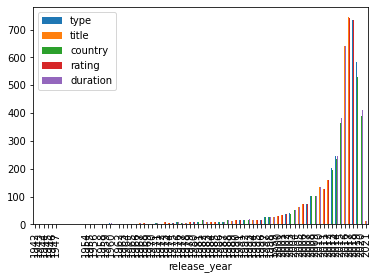

In [47]:
# though the release_year is difficult to see, it's clear that the number of movies released has generally increased over time (with a drop in 2020 likely due to covid-19)
only_movies.groupby('release_year').count().plot(kind='bar')

<AxesSubplot:xlabel='rating'>

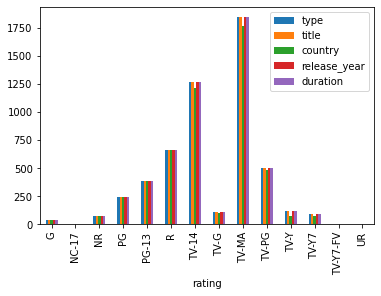

In [48]:
# the TV-MA and TV-14 ratings have the highest value counts
only_movies.groupby('rating').count().plot(kind='bar')